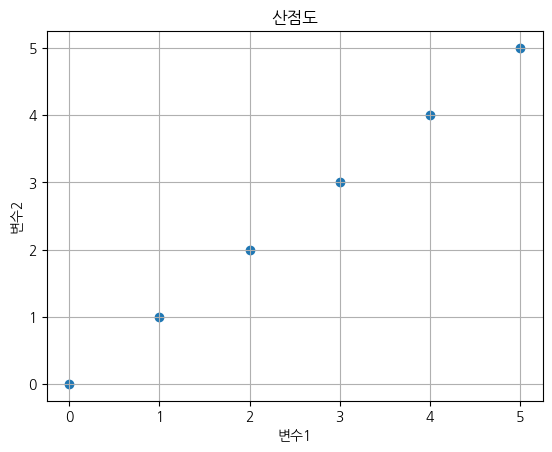

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
 
# 한글 폰트 사용을 위해서 세팅!!!!!!!!!!꼭 실행!!!

from matplotlib import font_manager, rc
font_path = r"C:\Users\paula\Desktop\안민주\Sejong Data project\CODE\Font\nanum-all\나눔 글꼴\나눔고딕\NanumFontSetup_TTF_GOTHIC\NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('변수1')
plt.ylabel('변수2')
plt.grid(True)
plt.show()


In [84]:
data_file1 =r"C:\Users\paula\Desktop\FINAL DATA\CSV\jj_talk.csv"
data_file2 =r"C:\Users\paula\Desktop\FINAL DATA\CSV\jj_say.csv"
# data_file="C:/Users/utael/Desktop/218_Python/say통합.xlsx"
annot_df1 = pd.read_csv(data_file1)
annot_df2 = pd.read_csv(data_file2)
merged_df = pd.concat([annot_df1, annot_df2], ignore_index=True)
excelfilename=data_file1[34:41]

In [85]:
#1900년 이전 생일의 화자 생년 바꾸는 함수
def birthyear_1052(values):
    if values<=1100:
        return values +900
    elif values<1700:
        return values+300
    else:
        return values
# 함수 적용해 1900년 이상으로 모두 변경
merged_df['birth_year']=merged_df['birth_year'].apply(birthyear_1052)

In [86]:
#연령대 컬럼 조건에 맞춰 추가

merged_df.loc[(1962 <= merged_df["birth_year"]) & (merged_df["birth_year"] <= 1971), 'ages'] = '50대'
merged_df.loc[(1952 <= merged_df["birth_year"]) & (merged_df["birth_year"] <= 1961), 'ages'] = '60대'
merged_df.loc[(1942 <= merged_df["birth_year"]) & (merged_df["birth_year"] <= 1951), 'ages'] = '70대'
merged_df.loc[(1932 <= merged_df["birth_year"]) & (merged_df["birth_year"] <= 1941) , 'ages'] = '80대'
merged_df.loc[(1922 <= merged_df["birth_year"]) & (merged_df["birth_year"] <= 1931) , 'ages'] = '90대'

merged_50_df = merged_df[merged_df['ages']=='50대']
merged_60_df = merged_df[merged_df['ages']=='60대']
merged_70_df = merged_df[merged_df['ages']=='70대']
merged_80_df = merged_df[merged_df['ages']=='80대']
merged_90_df = merged_df[merged_df['ages']=='90대']


In [87]:
merged_df

,json_file_name,utterance_type,speaker_id,residence_province,gender,birth_year,sentence_id,intent_type,intent_category,emotion_type,grammar_type,ages
0,talk_set1_collectorjj14_speakerjj59_speakerjj6...,talk,speakerjj59,jj,f,1972.0,1.0,REP,의견,irrelevant,DEC,NaN
1,talk_set1_collectorjj14_speakerjj59_speakerjj6...,talk,speakerjj59,jj,f,1972.0,2.0,DES,객관적경험,irrelevant,DEC,NaN
2,talk_set1_collectorjj14_speakerjj59_speakerjj6...,talk,speakerjj59,jj,f,1972.0,3.0,REP,의견,irrelevant,DEC,NaN
3,talk_set1_collectorjj14_speakerjj59_speakerjj6...,talk,speakerjj60,jj,m,1967.0,4.0,DES,객관적경험,irrelevant,DEC,50대
4,talk_set1_collectorjj14_speakerjj59_speakerjj6...,talk,speakerjj60,jj,m,1967.0,5.0,DES,객관적경험,irrelevant,DEC,50대
...,...,...,...,...,...,...,...,...,...,...,...,...
39480,say_set3_collectorjj87_speakerjj715_7_0_44,say,speakerjj715,jj,f,1959.0,2.0,DES,설명,irrelevant,DEC,60대
39481,say_set3_collectorjj87_speakerjj715_7_0_44,say,speakerjj715,jj,f,1959.0,3.0,DES,설명,irrelevant,DEC,60대
39482,say_set3_collectorjj87_speakerjj715_9_0_64,say,speakerjj715,jj,f,1959.0,1.0,DES,설명,irrelevant,DEC,60대
39483,say_set3_collectorjj87_speakerjj715_9_0_64,say,speakerjj715,jj,f,1959.0,2.0,REP,의견,negative,DEC,60대


In [88]:
# # 30대
# stat_30_intent_df = pd.DataFrame()
# stat_30_intent_df["intent_m"] = (annot_30_df[annot_30_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
# stat_30_intent_df["intent_f"] = (annot_30_df[annot_30_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

# stat_30_category_df = pd.DataFrame()
# stat_30_category_df["category_m"] = (annot_30_df[annot_30_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
# stat_30_category_df["category_f"] = (annot_30_df[annot_30_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

# stat_30_emotion_df = pd.DataFrame()
# stat_30_emotion_df["emotion_m"] = (annot_30_df[annot_30_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
# stat_30_emotion_df["emotion_f"] = (annot_30_df[annot_30_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

# stat_30_grammar_df = pd.DataFrame()
# stat_30_grammar_df["grammar_m"] = (annot_30_df[annot_30_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
# stat_30_grammar_df["grammar_f"] = (annot_30_df[annot_30_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

# # 40대
# stat_40_intent_df = pd.DataFrame()
# stat_40_intent_df["intent_m"] = (annot_40_df[annot_40_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
# stat_40_intent_df["intent_f"] = (annot_40_df[annot_40_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

# stat_40_category_df = pd.DataFrame()
# stat_40_category_df["category_m"] = (annot_40_df[annot_40_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
# stat_40_category_df["category_f"] = (annot_40_df[annot_40_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

# stat_40_emotion_df = pd.DataFrame()
# stat_40_emotion_df["emotion_m"] = (annot_40_df[annot_40_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
# stat_40_emotion_df["emotion_f"] = (annot_40_df[annot_40_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

# stat_40_grammar_df = pd.DataFrame()
# stat_40_grammar_df["grammar_m"] = (annot_40_df[annot_40_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
# stat_40_grammar_df["grammar_f"] = (annot_40_df[annot_40_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

# 50대
stat_50_intent_df = pd.DataFrame()
stat_50_intent_df["intent_m"] = (merged_50_df[merged_50_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
stat_50_intent_df["intent_f"] = (merged_50_df[merged_50_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

stat_50_category_df = pd.DataFrame()
stat_50_category_df["category_m"] = (merged_50_df[merged_50_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
stat_50_category_df["category_f"] = (merged_50_df[merged_50_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

stat_50_emotion_df = pd.DataFrame()
stat_50_emotion_df["emotion_m"] = (merged_50_df[merged_50_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
stat_50_emotion_df["emotion_f"] = (merged_50_df[merged_50_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

stat_50_grammar_df = pd.DataFrame()
stat_50_grammar_df["grammar_m"] = (merged_50_df[merged_50_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
stat_50_grammar_df["grammar_f"] = (merged_50_df[merged_50_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

# 60대
stat_60_intent_df = pd.DataFrame()
stat_60_intent_df["intent_m"] = (merged_60_df[merged_60_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
stat_60_intent_df["intent_f"] = (merged_60_df[merged_60_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

stat_60_category_df = pd.DataFrame()
stat_60_category_df["category_m"] = (merged_60_df[merged_60_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
stat_60_category_df["category_f"] = (merged_60_df[merged_60_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

stat_60_emotion_df = pd.DataFrame()
stat_60_emotion_df["emotion_m"] = (merged_60_df[merged_60_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
stat_60_emotion_df["emotion_f"] = (merged_60_df[merged_60_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

stat_60_grammar_df = pd.DataFrame()
stat_60_grammar_df["grammar_m"] = (merged_60_df[merged_60_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
stat_60_grammar_df["grammar_f"] = (merged_60_df[merged_60_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

# 70대
stat_70_intent_df = pd.DataFrame()
stat_70_intent_df["intent_m"] = (merged_70_df[merged_70_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
stat_70_intent_df["intent_f"] = (merged_70_df[merged_70_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

stat_70_category_df = pd.DataFrame()
stat_70_category_df["category_m"] = (merged_70_df[merged_70_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
stat_70_category_df["category_f"] = (merged_70_df[merged_70_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

stat_70_emotion_df = pd.DataFrame()
stat_70_emotion_df["emotion_m"] = (merged_70_df[merged_70_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
stat_70_emotion_df["emotion_f"] = (merged_70_df[merged_70_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

stat_70_grammar_df = pd.DataFrame()
stat_70_grammar_df["grammar_m"] = (merged_70_df[merged_70_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
stat_70_grammar_df["grammar_f"] = (merged_70_df[merged_70_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

# 80대
stat_80_intent_df = pd.DataFrame()
stat_80_intent_df["intent_m"] = (merged_80_df[merged_80_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
stat_80_intent_df["intent_f"] = (merged_80_df[merged_80_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

stat_80_category_df = pd.DataFrame()
stat_80_category_df["category_m"] = (merged_80_df[merged_80_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
stat_80_category_df["category_f"] = (merged_80_df[merged_80_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

stat_80_emotion_df = pd.DataFrame()
stat_80_emotion_df["emotion_m"] = (merged_80_df[merged_80_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
stat_80_emotion_df["emotion_f"] = (merged_80_df[merged_80_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

stat_80_grammar_df = pd.DataFrame()
stat_80_grammar_df["grammar_m"] = (merged_80_df[merged_80_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
stat_80_grammar_df["grammar_f"] = (merged_80_df[merged_80_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

# # 90대
stat_90_intent_df = pd.DataFrame()
stat_90_intent_df["intent_m"] = (merged_90_df[merged_90_df["gender"] == "m"])["intent_type"].value_counts().sort_index()
stat_90_intent_df["intent_f"] = (merged_90_df[merged_90_df["gender"] == "f"])["intent_type"].value_counts().sort_index()

stat_90_category_df = pd.DataFrame()
stat_90_category_df["category_m"] = (merged_90_df[merged_90_df["gender"] == "m"])["intent_category"].value_counts().sort_index()
stat_90_category_df["category_f"] = (merged_90_df[merged_90_df["gender"] == "f"])["intent_category"].value_counts().sort_index()

stat_90_emotion_df = pd.DataFrame()
stat_90_emotion_df["emotion_m"] = (merged_90_df[merged_90_df["gender"] == "m"])["emotion_type"].value_counts().sort_index()
stat_90_emotion_df["emotion_f"] = (merged_90_df[merged_90_df["gender"] == "f"])["emotion_type"].value_counts().sort_index()

stat_90_grammar_df = pd.DataFrame()
stat_90_grammar_df["grammar_m"] = (merged_90_df[merged_90_df["gender"] == "m"])["grammar_type"].value_counts().sort_index()
stat_90_grammar_df["grammar_f"] = (merged_90_df[merged_90_df["gender"] == "f"])["grammar_type"].value_counts().sort_index()

세부발화 의도 카테고리 묶음

In [89]:
REP_list = ['추측','가능','불확실','주장','의견','확신','판단','의사표시','동의',
                       '호응','반응','공감','비난','칭찬','변명','위로','약속','선언','임명','지명','주관적경험','자랑'] 
                       

EXP = '''
한탄
걱정
후회
좋음
싫음
느낌
불평
불만
못마땅함
의아함
감탄
놀람
신기함
고마움
미안함
안타까움
'''


DES = '''
안내
보고
묘사
설명
인용
객관적경험
'''

INT = '''
WH질문
Y/N질문
확인질문
'''

DIR = '''
명령
요구
금지
주의
'''

PRO = '''
부탁
권유
제안
'''
ETC = '''
인사
맞장구
'''
EXP_list = EXP.strip().split('\n')
DES_list = DES.strip().split('\n')
INT_list = INT.strip().split('\n')
DIR_list = DIR.strip().split('\n')
PRO_list = PRO.strip().split('\n')
ETC_list = ETC.strip().split('\n')



In [90]:
REP_50_df = pd.DataFrame(index=REP_list, columns=stat_50_category_df.columns)
EXP_50_df = pd.DataFrame(index=EXP_list, columns=stat_50_category_df.columns)
DES_50_df = pd.DataFrame(index=DES_list, columns=stat_50_category_df.columns)
INT_50_df = pd.DataFrame(index=INT_list, columns=stat_50_category_df.columns)
DIR_50_df = pd.DataFrame(index=DIR_list, columns=stat_50_category_df.columns)
PRO_50_df = pd.DataFrame(index=PRO_list, columns=stat_50_category_df.columns)
ETC_50_df = pd.DataFrame(index=ETC_list, columns=stat_50_category_df.columns)

REP_60_df = pd.DataFrame(index=REP_list, columns=stat_60_category_df.columns)
EXP_60_df = pd.DataFrame(index=EXP_list, columns=stat_60_category_df.columns)
DES_60_df = pd.DataFrame(index=DES_list, columns=stat_60_category_df.columns)
INT_60_df = pd.DataFrame(index=INT_list, columns=stat_60_category_df.columns)
DIR_60_df = pd.DataFrame(index=DIR_list, columns=stat_60_category_df.columns)
PRO_60_df = pd.DataFrame(index=PRO_list, columns=stat_60_category_df.columns)
ETC_60_df = pd.DataFrame(index=ETC_list, columns=stat_60_category_df.columns)

REP_70_df = pd.DataFrame(index=REP_list, columns=stat_70_category_df.columns)
EXP_70_df = pd.DataFrame(index=EXP_list, columns=stat_70_category_df.columns)
DES_70_df = pd.DataFrame(index=DES_list, columns=stat_70_category_df.columns)
INT_70_df = pd.DataFrame(index=INT_list, columns=stat_70_category_df.columns)
DIR_70_df = pd.DataFrame(index=DIR_list, columns=stat_70_category_df.columns)
PRO_70_df = pd.DataFrame(index=PRO_list, columns=stat_70_category_df.columns)
ETC_70_df = pd.DataFrame(index=ETC_list, columns=stat_70_category_df.columns)

REP_80_df = pd.DataFrame(index=REP_list, columns=stat_80_category_df.columns)
EXP_80_df = pd.DataFrame(index=EXP_list, columns=stat_80_category_df.columns)
DES_80_df = pd.DataFrame(index=DES_list, columns=stat_80_category_df.columns)
INT_80_df = pd.DataFrame(index=INT_list, columns=stat_80_category_df.columns)
DIR_80_df = pd.DataFrame(index=DIR_list, columns=stat_80_category_df.columns)
PRO_80_df = pd.DataFrame(index=PRO_list, columns=stat_80_category_df.columns)
ETC_80_df = pd.DataFrame(index=ETC_list, columns=stat_80_category_df.columns)

REP_90_df = pd.DataFrame(index=REP_list, columns=stat_90_category_df.columns)
EXP_90_df = pd.DataFrame(index=EXP_list, columns=stat_90_category_df.columns)
DES_90_df = pd.DataFrame(index=DES_list, columns=stat_90_category_df.columns)
INT_90_df = pd.DataFrame(index=INT_list, columns=stat_90_category_df.columns)
DIR_90_df = pd.DataFrame(index=DIR_list, columns=stat_90_category_df.columns)
PRO_90_df = pd.DataFrame(index=PRO_list, columns=stat_90_category_df.columns)
ETC_90_df = pd.DataFrame(index=ETC_list, columns=stat_90_category_df.columns)


REP_50_df = REP_50_df.fillna(0)
EXP_50_df = EXP_50_df.fillna(0)
DES_50_df = DES_50_df.fillna(0)
INT_50_df = INT_50_df.fillna(0)
DIR_50_df = DIR_50_df.fillna(0)
PRO_50_df = PRO_50_df.fillna(0)
ETC_50_df = ETC_50_df.fillna(0)

REP_60_df = REP_60_df.fillna(0)
EXP_60_df = EXP_60_df.fillna(0)
DES_60_df = DES_60_df.fillna(0)
INT_60_df = INT_60_df.fillna(0)
DIR_60_df = DIR_60_df.fillna(0)
PRO_60_df = PRO_60_df.fillna(0)
ETC_60_df = ETC_60_df.fillna(0)

REP_70_df = REP_70_df.fillna(0)
EXP_70_df = EXP_70_df.fillna(0)
DES_70_df = DES_70_df.fillna(0)
INT_70_df = INT_70_df.fillna(0)
DIR_70_df = DIR_70_df.fillna(0)
PRO_70_df = PRO_70_df.fillna(0)
ETC_70_df = ETC_70_df.fillna(0)

REP_80_df = REP_80_df.fillna(0)
EXP_80_df = EXP_80_df.fillna(0)
DES_80_df = DES_80_df.fillna(0)
INT_80_df = INT_80_df.fillna(0)
DIR_80_df = DIR_80_df.fillna(0)
PRO_80_df = PRO_80_df.fillna(0)
ETC_80_df = ETC_80_df.fillna(0)

REP_90_df = REP_90_df.fillna(0)
EXP_90_df = EXP_90_df.fillna(0)
DES_90_df = DES_90_df.fillna(0)
INT_90_df = INT_90_df.fillna(0)
DIR_90_df = DIR_90_df.fillna(0)
PRO_90_df = PRO_90_df.fillna(0)
ETC_90_df = ETC_90_df.fillna(0)


for category in REP_list:
    if category in stat_50_category_df.index:
        REP_50_df.loc[category] = stat_50_category_df.loc[category]
    if category in stat_60_category_df.index:
        REP_60_df.loc[category] = stat_60_category_df.loc[category]
    if category in stat_70_category_df.index:
        REP_70_df.loc[category] = stat_70_category_df.loc[category]
    if category in stat_80_category_df.index:
        REP_80_df.loc[category] = stat_80_category_df.loc[category]
    if category in stat_90_category_df.index:
        REP_90_df.loc[category] = stat_90_category_df.loc[category]
        
for category in EXP_list:
    if category in stat_50_category_df.index:
        EXP_50_df.loc[category] = stat_50_category_df.loc[category]
    if category in stat_60_category_df.index:
        EXP_60_df.loc[category] = stat_60_category_df.loc[category]
    if category in stat_70_category_df.index:
        EXP_70_df.loc[category] = stat_70_category_df.loc[category]
    if category in stat_80_category_df.index:
        EXP_80_df.loc[category] = stat_80_category_df.loc[category]
    if category in stat_90_category_df.index:
        EXP_90_df.loc[category] = stat_90_category_df.loc[category]

for category in DES_list:
    if category in stat_50_category_df.index:
        DES_50_df.loc[category] = stat_50_category_df.loc[category]
    if category in stat_60_category_df.index:
        DES_60_df.loc[category] = stat_60_category_df.loc[category]
    if category in stat_70_category_df.index:
        DES_70_df.loc[category] = stat_70_category_df.loc[category]
    if category in stat_80_category_df.index:
        DES_80_df.loc[category] = stat_80_category_df.loc[category]
    if category in stat_90_category_df.index:
        DES_90_df.loc[category] = stat_90_category_df.loc[category]
        
for category in INT_list:
    if category in stat_50_category_df.index:
        INT_50_df.loc[category] = stat_50_category_df.loc[category]
    if category in stat_60_category_df.index:
        INT_60_df.loc[category] = stat_60_category_df.loc[category]
    if category in stat_70_category_df.index:
        INT_70_df.loc[category] = stat_70_category_df.loc[category]
    if category in stat_80_category_df.index:
        INT_80_df.loc[category] = stat_80_category_df.loc[category]
    if category in stat_90_category_df.index:
        INT_90_df.loc[category] = stat_90_category_df.loc[category]
        
for category in DIR_list:
    if category in stat_50_category_df.index:
        DIR_50_df.loc[category] = stat_50_category_df.loc[category]
    if category in stat_60_category_df.index:
        DIR_60_df.loc[category] = stat_60_category_df.loc[category]
    if category in stat_70_category_df.index:
        DIR_70_df.loc[category] = stat_70_category_df.loc[category]
    if category in stat_80_category_df.index:
        DIR_80_df.loc[category] = stat_80_category_df.loc[category]
    if category in stat_90_category_df.index:
        DIR_90_df.loc[category] = stat_90_category_df.loc[category]

for category in PRO_list:
    if category in stat_50_category_df.index:
        PRO_50_df.loc[category] = stat_50_category_df.loc[category]
    if category in stat_60_category_df.index:
        PRO_60_df.loc[category] = stat_60_category_df.loc[category]
    if category in stat_70_category_df.index:
        PRO_70_df.loc[category] = stat_70_category_df.loc[category]
    if category in stat_80_category_df.index:
        PRO_80_df.loc[category] = stat_80_category_df.loc[category]
    if category in stat_90_category_df.index:
        PRO_90_df.loc[category] = stat_90_category_df.loc[category]
        
for category in ETC_list:
    if category in stat_50_category_df.index:
        ETC_50_df.loc[category] = stat_50_category_df.loc[category]
    if category in stat_60_category_df.index:
        ETC_60_df.loc[category] = stat_60_category_df.loc[category]
    if category in stat_70_category_df.index:
        ETC_70_df.loc[category] = stat_70_category_df.loc[category]
    if category in stat_80_category_df.index:
        ETC_80_df.loc[category] = stat_80_category_df.loc[category]
    if category in stat_90_category_df.index:
        ETC_90_df.loc[category] = stat_90_category_df.loc[category]

엑셀파일 생성용 코드들

In [91]:
REP_50_df

,category_m,category_f
추측,64,413
가능,2,4
불확실,33,169
주장,73,418
의견,595,3819
확신,20,117
판단,55,346
의사표시,137,703
동의,4,43
호응,0,0


In [92]:
import openpyxl
stat_5090_intent=pd.DataFrame()
stat_5090_intent['50대 남성 REP']=stat_50_intent_df['intent_m']
stat_5090_intent['60대 남성 REP']=stat_60_intent_df['intent_m']
stat_5090_intent['70대 남성 REP']=stat_70_intent_df['intent_m']
stat_5090_intent['80대 남성 REP']=stat_80_intent_df['intent_m']
stat_5090_intent['90대 남성 REP']=stat_90_intent_df['intent_m']
stat_5090_intent['50대 여성 REP']=stat_50_intent_df['intent_f']
stat_5090_intent['60대 여성 REP']=stat_60_intent_df['intent_f']
stat_5090_intent['70대 여성 REP']=stat_70_intent_df['intent_f']
stat_5090_intent['80대 여성 REP']=stat_80_intent_df['intent_f']
stat_5090_intent['90대 여성 REP']=stat_90_intent_df['intent_f']

stat_5090_emotion=pd.DataFrame()
stat_5090_emotion['50대 남성 REP']=stat_50_emotion_df['emotion_m']
stat_5090_emotion['60대 남성 REP']=stat_60_emotion_df['emotion_m']
stat_5090_emotion['70대 남성 REP']=stat_70_emotion_df['emotion_m']
stat_5090_emotion['80대 남성 REP']=stat_80_emotion_df['emotion_m']
stat_5090_emotion['90대 남성 REP']=stat_90_emotion_df['emotion_m']
stat_5090_emotion['50대 여성 REP']=stat_50_emotion_df['emotion_f']
stat_5090_emotion['60대 여성 REP']=stat_60_emotion_df['emotion_f']
stat_5090_emotion['70대 여성 REP']=stat_70_emotion_df['emotion_f']
stat_5090_emotion['80대 여성 REP']=stat_80_emotion_df['emotion_f']
stat_5090_emotion['90대 여성 REP']=stat_90_emotion_df['emotion_f']

stat_5090_grammar=pd.DataFrame()
stat_5090_grammar['50대 남성 REP']=stat_50_grammar_df['grammar_m']
stat_5090_grammar['60대 남성 REP']=stat_60_grammar_df['grammar_m']
stat_5090_grammar['70대 남성 REP']=stat_70_grammar_df['grammar_m']
stat_5090_grammar['80대 남성 REP']=stat_80_grammar_df['grammar_m']
stat_5090_grammar['90대 남성 REP']=stat_90_grammar_df['grammar_m']
stat_5090_grammar['50대 여성 REP']=stat_50_grammar_df['grammar_f']
stat_5090_grammar['60대 여성 REP']=stat_60_grammar_df['grammar_f']
stat_5090_grammar['70대 여성 REP']=stat_70_grammar_df['grammar_f']
stat_5090_grammar['80대 여성 REP']=stat_80_grammar_df['grammar_f']
stat_5090_grammar['90대 여성 REP']=stat_90_grammar_df['grammar_f']


REP_5090_category=pd.DataFrame()
REP_5090_category['50대 남성 REP']=REP_50_df['category_m']
REP_5090_category['60대 남성 REP']=REP_60_df['category_m']
REP_5090_category['70대 남성 REP']=REP_70_df['category_m']
REP_5090_category['80대 남성 REP']=REP_80_df['category_m']
REP_5090_category['90대 남성 REP']=REP_90_df['category_m']
REP_5090_category['50대 여성 REP']=REP_50_df['category_f']
REP_5090_category['60대 여성 REP']=REP_60_df['category_f']
REP_5090_category['70대 여성 REP']=REP_70_df['category_f']
REP_5090_category['80대 여성 REP']=REP_80_df['category_f']
REP_5090_category['90대 여성 REP']=REP_90_df['category_f']

EXP_5090_category=pd.DataFrame()
EXP_5090_category['50대 남성 EXP']=EXP_50_df['category_m']
EXP_5090_category['60대 남성 EXP']=EXP_60_df['category_m']
EXP_5090_category['70대 남성 EXP']=EXP_70_df['category_m']
EXP_5090_category['80대 남성 EXP']=EXP_80_df['category_m']
EXP_5090_category['90대 남성 EXP']=EXP_90_df['category_m']
EXP_5090_category['50대 여성 EXP']=EXP_50_df['category_f']
EXP_5090_category['60대 여성 EXP']=EXP_60_df['category_f']
EXP_5090_category['70대 여성 EXP']=EXP_70_df['category_f']
EXP_5090_category['80대 여성 EXP']=EXP_80_df['category_f']
EXP_5090_category['90대 여성 EXP']=EXP_90_df['category_f']

DES_5090_category=pd.DataFrame()
DES_5090_category['50대 남성 DES']=DES_50_df['category_m']
DES_5090_category['60대 남성 DES']=DES_60_df['category_m']
DES_5090_category['70대 남성 DES']=DES_70_df['category_m']
DES_5090_category['80대 남성 DES']=DES_80_df['category_m']
DES_5090_category['90대 남성 DES']=DES_90_df['category_m']
DES_5090_category['50대 여성 DES']=DES_50_df['category_f']
DES_5090_category['60대 여성 DES']=DES_60_df['category_f']
DES_5090_category['70대 여성 DES']=DES_70_df['category_f']
DES_5090_category['80대 여성 DES']=DES_80_df['category_f']
DES_5090_category['90대 여성 DES']=DES_90_df['category_f']

INT_5090_category=pd.DataFrame()
INT_5090_category['50대 남성 INT']=INT_50_df['category_m']
INT_5090_category['60대 남성 INT']=INT_60_df['category_m']
INT_5090_category['70대 남성 INT']=INT_70_df['category_m']
INT_5090_category['80대 남성 INT']=INT_80_df['category_m']
INT_5090_category['90대 남성 INT']=INT_90_df['category_m']
INT_5090_category['50대 여성 INT']=INT_50_df['category_f']
INT_5090_category['60대 여성 INT']=INT_60_df['category_f']
INT_5090_category['70대 여성 INT']=INT_70_df['category_f']
INT_5090_category['80대 여성 INT']=INT_80_df['category_f']
INT_5090_category['90대 여성 INT']=INT_90_df['category_f']

DIR_5090_category=pd.DataFrame()
DIR_5090_category['50대 남성 DIR']=DIR_50_df['category_m']
DIR_5090_category['60대 남성 DIR']=DIR_60_df['category_m']
DIR_5090_category['70대 남성 DIR']=DIR_70_df['category_m']
DIR_5090_category['80대 남성 DIR']=DIR_80_df['category_m']
DIR_5090_category['90대 남성 DIR']=DIR_90_df['category_m']
DIR_5090_category['50대 여성 DIR']=DIR_50_df['category_f']
DIR_5090_category['60대 여성 DIR']=DIR_60_df['category_f']
DIR_5090_category['70대 여성 DIR']=DIR_70_df['category_f']
DIR_5090_category['80대 여성 DIR']=DIR_80_df['category_f']
DIR_5090_category['90대 여성 DIR']=DIR_90_df['category_f']

PRO_5090_category=pd.DataFrame()
PRO_5090_category['50대 남성 PRO']=PRO_50_df['category_m']
PRO_5090_category['60대 남성 PRO']=PRO_60_df['category_m']
PRO_5090_category['70대 남성 PRO']=PRO_70_df['category_m']
PRO_5090_category['80대 남성 PRO']=PRO_80_df['category_m']
PRO_5090_category['90대 남성 PRO']=PRO_90_df['category_m']
PRO_5090_category['50대 여성 PRO']=PRO_50_df['category_f']
PRO_5090_category['60대 여성 PRO']=PRO_60_df['category_f']
PRO_5090_category['70대 여성 PRO']=PRO_70_df['category_f']
PRO_5090_category['80대 여성 PRO']=PRO_80_df['category_f']
PRO_5090_category['90대 여성 PRO']=PRO_90_df['category_f']

ETC_5090_category=pd.DataFrame()
ETC_5090_category['50대 남성 ETC']=ETC_50_df['category_m']
ETC_5090_category['60대 남성 ETC']=ETC_60_df['category_m']
ETC_5090_category['70대 남성 ETC']=ETC_70_df['category_m']
ETC_5090_category['80대 남성 ETC']=ETC_80_df['category_m']
ETC_5090_category['90대 남성 ETC']=ETC_90_df['category_m']
ETC_5090_category['50대 여성 ETC']=ETC_50_df['category_f']
ETC_5090_category['60대 여성 ETC']=ETC_60_df['category_f']
ETC_5090_category['70대 여성 ETC']=ETC_70_df['category_f']
ETC_5090_category['80대 여성 ETC']=ETC_80_df['category_f']
ETC_5090_category['90대 여성 ETC']=ETC_90_df['category_f']
"""
directory_path = r"C:\Users\paula\Desktop\FINAL DATA"
writer = pd.ExcelWriter(directory_path + "/" + data_file1[34:41] + "_5090_MERGED_전체 통계.xlsx")

stat_5090_intent.to_excel(writer, sheet_name="발화의도")
stat_5090_emotion.to_excel(writer, sheet_name="감정")
stat_5090_grammar.to_excel(writer, sheet_name="문장유형")
REP_5090_category.to_excel(writer, sheet_name="REP")
EXP_5090_category.to_excel(writer, sheet_name="EXP")
DES_5090_category.to_excel(writer, sheet_name="DES")
INT_5090_category.to_excel(writer, sheet_name="INT")
DIR_5090_category.to_excel(writer, sheet_name="DIR")
PRO_5090_category.to_excel(writer, sheet_name="PRO")
ETC_5090_category.to_excel(writer, sheet_name="ETC")
writer.save()
"""